## Using Ensemble Technique to Improve Performance of Decision Tree
* Bagging
* Random Forest
* Boosting

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Documents\Udemy ML course\Machine learning COurse resources\Data Files\3. ST Academy - Decision Trees resource files\Movie_classification.csv", header=0)

In [41]:
df["Time_taken"].fillna(value=df["Time_taken"].mean(), inplace=True)

In [42]:
df = pd.get_dummies(df, columns=["3D_available","Genre"], drop_first=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [44]:
X = df.loc[:, df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [45]:
y = df["Start_Tech_Oscar"]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Bagging

In [48]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=0)

In [51]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=0)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [53]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[28, 16],
       [21, 37]], dtype=int64)

In [54]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6372549019607843

### Random Forest Classifier

In [55]:
 from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [57]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [58]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [59]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

In [36]:
rf_clf = RandomForestClassifier(n_estimators=250, random_state=42)

In [60]:
param_grid = {"max_features":[4,5,6,7,8,9,10], "min_samples_split":[2, 3, 10]}

In [61]:
grid_search = GridSearchCV(rf_clf, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

In [63]:
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [65]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 2}

In [66]:
cvrf_clf = grid_search.best_estimator_

In [67]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[27, 17],
       [19, 39]], dtype=int64)

In [68]:
accuracy_score(y_test
              , cvrf_clf.predict(X_test))

0.6470588235294118

### Boosting

1. Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5784313725490197

In [86]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)

In [87]:
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [88]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.6176470588235294

2. AdaBoost

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
ada_clf= AdaBoostClassifier(learning_rate=0.2, n_estimators=5000)

In [105]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=500)

In [106]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6372549019607843

In [107]:
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate=0.2, n_estimators=500)

In [109]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.2, n_estimators=500)

In [110]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.6372549019607843

XG Boost

In [112]:
import xgboost as xgb

In [114]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimator=10000, learning_rate = 0.3)

In [115]:
xgb_clf.fit(X_train, y_train)

[21:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\conda1\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=10000, n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [116]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6666666666666666

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

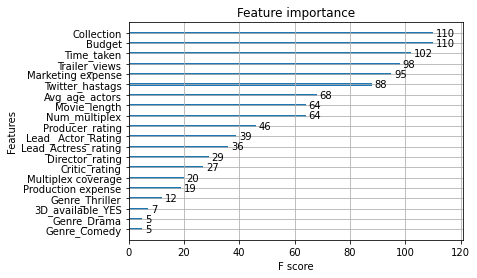

In [117]:
xgb.plot_importance(xgb_clf)

In [118]:
xgb_clf = xgb.XGBClassifier(n_estimator = 500, learning_rate = 0.1, random_state=42)

In [119]:
param_test1= {
    'max_depth':range(3,10,2),
    'gamma': [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree': [0.8,0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

In [120]:
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='accuracy')

In [121]:
grid_search.fit(X_train, y_train)

[21:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\envs\conda1\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimator=500, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tre

In [124]:
cvxg_clf = grid_search.best_estimator_

In [125]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6176470588235294